#                              Analisis Exploratorio de Datos
####                                            ------------------------------------------------------------------------------------------

En este notebook vamos a visualizar los datos, para empezar a comprender:

    1- Caracteristicas del DataSet
    2- Relaciones entre variables
    3- Relacion con el Target
    4- Distribucion 

## Librerias de Base

In [ ]:
# Importamos los paquetes que necesitamos para operar

import pandas as pd
#Permite ver todas las columnas y filas en las consultas
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',10000)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

## Importamos los datos del CSV


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Diplomatura - Compartido/BaseFinal.zip')
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (99,101,103) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,NUMERO_DE_CLIENTE,FOTO_MES,MARKETING_ACTIVO_ULTIMOS90DIAS,CLIENTE_VIP,CLIENTE_SUCURSAL,CLIENTE_EDAD,CLIENTE_ANTIGUEDAD,MRENTABILIDAD,MRENTABILIDAD_ANNUAL,MCOMISIONES,MACTIVOS_MARGEN,MPASIVOS_MARGEN,TCUENTAS,TCUENTA_CORRIENTE,MCUENTA_CORRIENTE_NOPAQUETE,MCUENTA_CORRIENTE_PAQUETE,MCUENTA_CORRIENTE_DOLARES,TCAJA_AHORRO,MCAJA_AHORRO_PAQUETE,MCAJA_AHORRO_NOPAQUETE,MCAJA_AHORRO_DOLARES,MDESCUBIERTO_PREACORDADO,MCUENTAS_SALDO,TTARJETA_DEBITO,CTARJETA_DEBITO_TRANSACCIONES,MAUTOSERVICIO,TTARJETA_VISA,CTARJETA_VISA_TRANSACCIONES,MTARJETA_VISA_CONSUMO,TTARJETA_MASTER,CTARJETA_MASTER_TRANSACCIONES,MTARJETA_MASTER_CONSUMO,CPRESTAMOS_PERSONALES,MPRESTAMOS_PERSONALES,CPRESTAMOS_PRENDARIOS,MPRESTAMOS_PRENDARIOS,CPRESTAMOS_HIPOTECARIOS,MPRESTAMOS_HIPOTECARIOS,TPLAZO_FIJO,MPLAZO_FIJO_DOLARES,MPLAZO_FIJO_PESOS,TFONDOS_COMUNES_INVERSION,MFONDOS_COMUNES_INVERSION_PESOS,MFONDOS_COMUNES_INVERSION_DOLARE,TTITULOS,MTITULOS,TSEGURO_VIDA_MERCADO_ABIERTO,TSEGURO_AUTO,TSEGURO_VIVIENDA,TSEGURO_ACCIDENTES_PERSONALES,TCAJA_SEGURIDAD,MBONOS_GOBIERNO,MMONEDAS_EXTRANJERAS,MINVERSIONES_OTRAS,TPLAN_SUELDO,MPLAN_SUELDO,MPLAN_SUELDO_MANUAL,CPLAN_SUELDO_TRANSACCION,TCUENTA_DEBITOS_AUTOMATICOS,MCUENTA_DEBITOS_AUTOMATICOS,TTARJETA_VISA_DEBITOS_AUTOMATICO,MTTARJETA_VISA_DEBITOS_AUTOMATIC,TTARJETA_MASTER_DEBITOS_AUTOMATI,MTTARJETA_MASTER_DEBITOS_AUTOMAT,TPAGODESERVICIOS,MPAGODESERVICIOS,TPAGOMISCUENTAS,MPAGOMISCUENTAS,CCAJEROS_PROPIOS_DESCUENTOS,MCAJEROS_PROPIOS_DESCUENTOS,CTARJETA_VISA_DESCUENTOS,MTARJETA_VISA_DESCUENTOS,CTARJETA_MASTER_DESCUENTOS,MTARJETA_MASTER_DESCUENTOS,CCUENTA_DESCUENTOS,MCUENTA_DESCUENTOS,CCOMISIONES_MANTENIMIENTO,MCOMISIONES_MANTENIMIENTO,CCOMISIONES_OTRAS,MCOMISIONES_OTRAS,TCAMBIO_MONEDAS,CCAMBIO_MONEDAS_COMPRA,MCAMBIO_MONEDAS_COMPRA,CCAMBIO_MONEDAS_VENTA,MCAMBIO_MONEDAS_VENTA,CTRANSFERENCIAS_RECIBIDAS,MTRANSFERENCIAS_RECIBIDAS,CTRANSFERENCIAS_EMITIDAS,MTRANSFERENCIAS_EMITIDAS,CEXTRACCION_AUTOSERVICIO,MEXTRACCION_AUTOSERVICIO,CCHEQUES_DEPOSITADOS,MCHEQUES_DEPOSITADOS,CCHEQUES_EMITIDOS,MCHEQUES_EMITIDOS,CCHEQUES_DEPOSITADOS_RECHAZADOS,MCHEQUES_DEPOSITADOS_RECHAZADOS,CCHEQUES_EMITIDOS_RECHAZADOS,MCHEQUES_EMITIDOS_RECHAZADOS,TCALLCENTER,CCALLCENTER_TRANSACCIONES,THOMEBANKING,CHOMEBANKING_TRANSACCIONES,TAUTOSERVICIO,CAUTOSERVICIO_TRANSACCIONES,TCAJAS,TCAJAS_CONSULTAS,TCAJAS_DEPOSITOS,TCAJAS_EXTRACCIONES,TCAJAS_OTRAS,CCAJEROS_PROPIO_TRANSACCIONES,MCAJEROS_PROPIO,CCAJEROS_AJENOS_TRANSACCIONES,MCAJEROS_AJENOS,TMOVIMIENTOS_ULTIMOS90DIAS,MASTER_MARCA_ATRASO,MASTER_CUENTA_ESTADO,MASTER_MFINANCIACION_LIMITE,MASTER_FVENCIMIENTO,MASTER_FINICIOMORA,MASTER_MSALDOTOTAL,MASTER_MSALDOPESOS,MASTER_MSALDODOLARES,MASTER_MCONSUMOSPESOS,MASTER_MCONSUMOSDOLARES,MASTER_MLIMITECOMPRA,MASTER_MADELANTOPESOS,MASTER_MADELANTODOLARES,MASTER_FULTIMO_CIERRE,MASTER_MPAGADO,MASTER_MPAGOSPESOS,MASTER_MPAGOSDOLARES,MASTER_FECHAALTA,MASTER_MCONSUMOTOTAL,MASTER_TCONSUMOS,MASTER_TADELANTOSEFECTIVO,MASTER_MPAGOMINIMO,VISA_MARCA_ATRASO,VISA_CUENTA_ESTADO,VISA_MFINANCIACION_LIMITE,VISA_FVENCIMIENTO,VISA_FINICIOMORA,VISA_MSALDOTOTAL,VISA_MSALDOPESOS,VISA_MSALDODOLARES,VISA_MCONSUMOSPESOS,VISA_MCONSUMOSDOLARES,VISA_MLIMITECOMPRA,VISA_MADELANTOPESOS,VISA_MADELANTODOLARES,VISA_FULTIMO_CIERRE,VISA_MPAGADO,VISA_MPAGOSPESOS,VISA_MPAGOSDOLARES,VISA_FECHAALTA,VISA_MCONSUMOTOTAL,VISA_TCONSUMOS,VISA_TADELANTOSEFECTIVO,VISA_MPAGOMINIMO,CLASE,CLASE_BIN
0,19602557,201401,1.0,0,143,61,140,0.0,7415.61,0.0,0.0,0.0,S,S,0.0,-151.26,0.0,S,1837.98,0.0,0.00,1.17,5944.31,S,2,864.09,S,0,0.0,S,0,0.0,0,0.00,0,0.0,0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,0.00,0.0,0,NaN,0.0,S,2492.0,S,1348.0,NaN,0.0,S,1588.0,0,11.48,0,0.0,1,0.0,0,0,0,0.0,0,0.0,NaN,0,0.0,0,0.0,0,0.0,0,0.0,2,2574.0,0,0.0,0,0.0,0,0.0,0,0.0,S,7,S,90,S,2,NaN,NaN,NaN,NaN,NaN,2,2574.0,0,0.0,S,0.0,10.0,18954.0,20160430.0,NaN,9273.58,9273.58,0.0,2440.83,0.0,21060.0,0.0,0.0,20140130.0,0.0,-1216.80,0.0,20100420.0,2440.83,S,NaN,725.4,0.0,10.0,22113.0,20160831.0,NaN,30633.54,35171.69,669.54,10424.81,142.04,24570.0,0.0,0.0,20140123.

## Informacion General

In [ ]:
print('Shape {} \n'.format(df.shape) )

print('Distribucion del Target \n{}\n'.format(df[['CLASE_BIN','NUMERO_DE_CLIENTE']].groupby(["CLASE_BIN"]).agg({"count"})))

print('Nro Variable     Nombre Variable {} \n'.format(pd.DataFrame(df.columns)) )

Shape (1038410, 161) 

Distribucion del Target 
          NUMERO_DE_CLIENTE
                      count
CLASE_BIN                  
0                   1035813
1                      2597

Nro Variable     Nombre Variable                                     0
0                   NUMERO_DE_CLIENTE
1                            FOTO_MES
2      MARKETING_ACTIVO_ULTIMOS90DIAS
3                         CLIENTE_VIP
4                    CLIENTE_SUCURSAL
5                        CLIENTE_EDAD
6                  CLIENTE_ANTIGUEDAD
7                       MRENTABILIDAD
8                MRENTABILIDAD_ANNUAL
9                         MCOMISIONES
10                    MACTIVOS_MARGEN
11                    MPASIVOS_MARGEN
12                           TCUENTAS
13                  TCUENTA_CORRIENTE
14        MCUENTA_CORRIENTE_NOPAQUETE
15          MCUENTA_CORRIENTE_PAQUETE
16          MCUENTA_CORRIENTE_DOLARES
17                       TCAJA_AHORRO
18               MCAJA_AHORRO_PAQUETE
19             MCA

In [ ]:
# Seleccionamos tipo de variables
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#numerics = ['int16', 'int32', 'int64']
#numerics = ['float16', 'float32', 'float64']

# Variables Numericas
var_numericas = df.select_dtypes(include=numerics).columns

# Identificamos las Continuas

A = df[var_numericas]
B = A.nunique()
C = pd.DataFrame(B) 
C.reset_index(inplace=True)
C.columns = ['variable','valor']
D = C[C.valor >= 100]['variable']
var_continuas = D.values

# Identificamos las Discretas

E = C[(C.valor >= 10) & (C.valor < 100)]['variable']
var_discretas = E.values

# Identificamos las Categoricas (dentro de las numericas)

F = C[(C.valor >= 3) & (C.valor < 10)]['variable']
var_categoricas_numericas = F.values

# Identificamos las Categoricas binarias

G = C[(C.valor == 2)]['variable']
var_binarias_numericas = G.values

# Resumen
print('Hay {} variables numericas\n{} continuas, {} discretas, {} categoricas (numericas), {} flags (numericas)'.format(len(var_numericas)  
                                                                                                    ,len(var_continuas)
                                                                                                    ,len(var_discretas)
                                                                                                    ,len(var_categoricas_numericas) 
                                                                                                    ,len(var_binarias_numericas) )  )

# Variables numericas no tipificadas

resto = []

for i in var_numericas:
    if i in var_continuas:
        break
    elif i in var_discretas:
        break
    elif i in var_categoricas_numericas:
        break
    elif i in var_binarias_numericas:
        break
    else:
        resto.append(i)

print('\ny estas variables son numericas pero no fueron tipificadas')
display(resto) 


Hay 127 variables numericas
93 continuas, 12 discretas, 7 categoricas (numericas), 6 flags (numericas)

y estas variables son numericas pero no fueron tipificadas


[]

In [ ]:
# Variables Strings

strings = ['object', 'uint8']
var_string = df.select_dtypes(include=strings).columns

A = df[var_string]
B = A.nunique()
C = pd.DataFrame(B) 
C.reset_index(inplace=True)
C.columns = ['variable','valor']
D = C[C.valor < 20]['variable']
var_categoricas_string = list(D.values)

print('Hay {} variables categoricas'.format(len(var_categoricas_string)))
var_categoricas_string


Hay 34 variables categoricas


['TCUENTAS',
 'TCUENTA_CORRIENTE',
 'TCAJA_AHORRO',
 'TTARJETA_DEBITO',
 'TTARJETA_VISA',
 'TTARJETA_MASTER',
 'TPLAZO_FIJO',
 'TFONDOS_COMUNES_INVERSION',
 'TTITULOS',
 'TSEGURO_VIDA_MERCADO_ABIERTO',
 'TSEGURO_AUTO',
 'TSEGURO_VIVIENDA',
 'TSEGURO_ACCIDENTES_PERSONALES',
 'TCAJA_SEGURIDAD',
 'TPLAN_SUELDO',
 'TCUENTA_DEBITOS_AUTOMATICOS',
 'TTARJETA_VISA_DEBITOS_AUTOMATICO',
 'TTARJETA_MASTER_DEBITOS_AUTOMATI',
 'TPAGODESERVICIOS',
 'TPAGOMISCUENTAS',
 'TCAMBIO_MONEDAS',
 'TCALLCENTER',
 'THOMEBANKING',
 'TAUTOSERVICIO',
 'TCAJAS',
 'TCAJAS_DEPOSITOS',
 'TCAJAS_EXTRACCIONES',
 'TCAJAS_OTRAS',
 'TMOVIMIENTOS_ULTIMOS90DIAS',
 'MASTER_TCONSUMOS',
 'MASTER_TADELANTOSEFECTIVO',
 'VISA_TCONSUMOS',
 'VISA_TADELANTOSEFECTIVO',
 'CLASE']

### Extraemos una base resumida del total de datos
1 fila por ID Cliente, con 1 columna por cada mes para conocer si estuvieron activos

De ahí obtenemos cuántos meses estuvieron activos entre 201301 y 201402, no contamos hasta abril 2014 porque sino le daríamos una pista al modelo de quiénes no se dieron de baja en 2012 + 2 meses.
Comparamos con la columna *antiguedad_cliente* 
También obtenemos la edad y si es cliente vip.

In [ ]:
df_meses = df['NUMERO_DE_CLIENTE', 'CLIENTE_ANTIGUEDAD', 'FOTO_MES', 'CLIENTE_VIP', 'CLIENTE_EDAD']
# Quitamos filas duplicadas (mismo ID cliente y foto_mes)
df_meses2 = df_meses.drop_duplicates()
# Creamos una columna con el valor 1 para pivotear luego
df_meses2['N'] = 1
df1_pivot = df_meses2.pivot(index='NUMERO_DE_CLIENTE', columns='FOTO_MES', values='N')
df1_pivot = df1_pivot.rename_axis(None, axis=1).reset_index()
df1_pivot.head()

In [ ]:
# Retomamos los datos de antiguedad, edad, y si es vip
df_meses1= df_meses.drop_duplicates(subset='NUMERO_DE_CLIENTE', keep='last')
# Mergeamos con la base pivoteada
resumen = pd.merge(df2_pivot, df_meses1, on=['NUMERO_DE_CLIENTE', 'NUMERO_DE_CLIENTE'], how='left')
resumen.head()

## BoxPlot

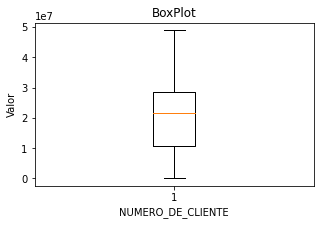

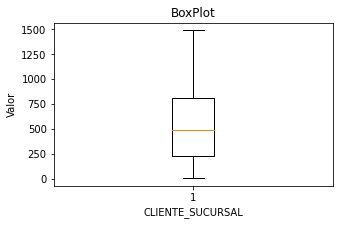

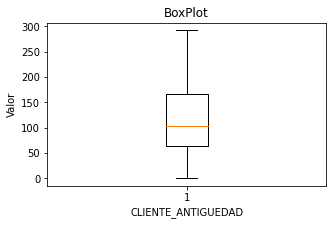

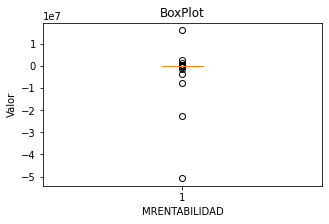

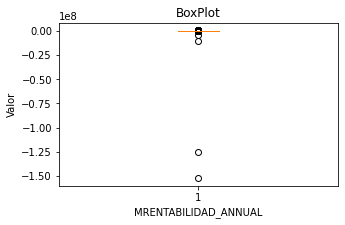

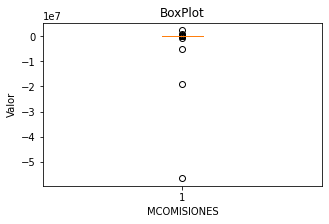

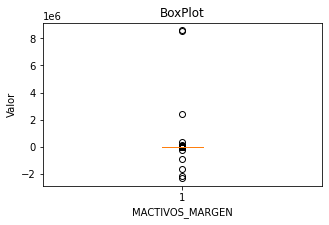

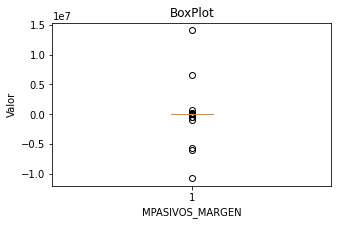

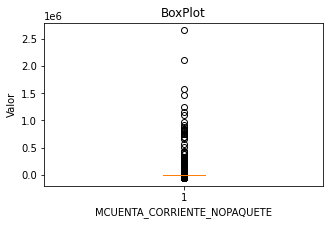

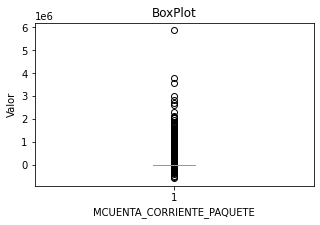

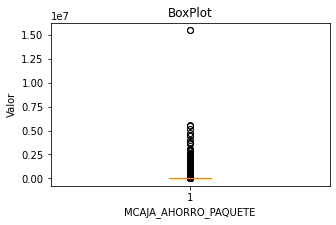

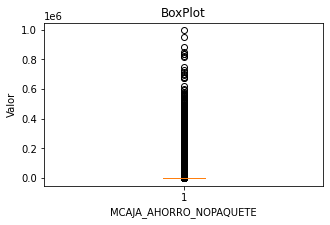

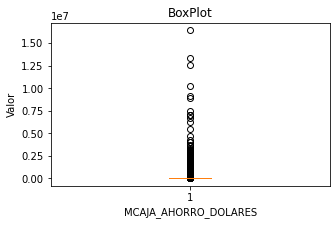

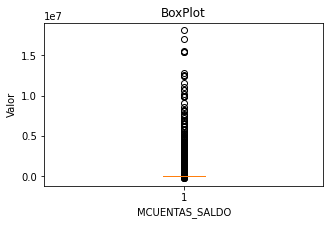

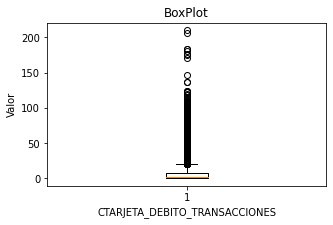

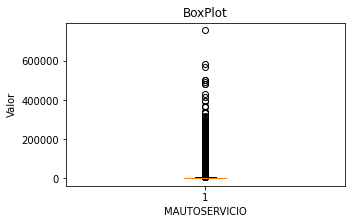

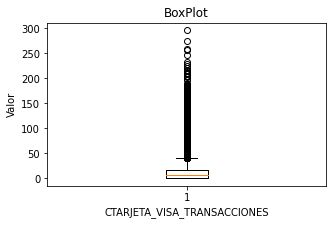

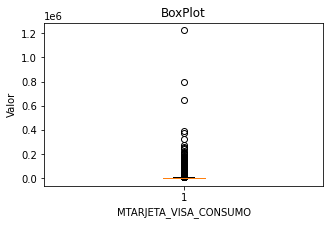

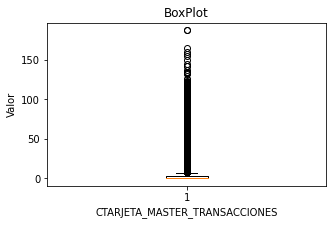

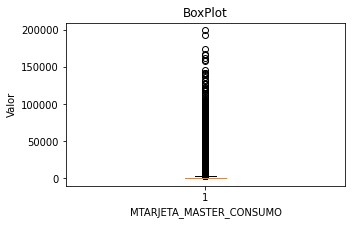

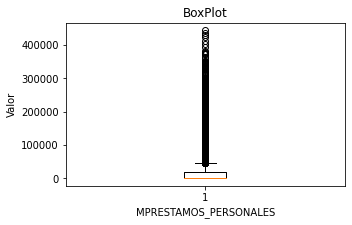

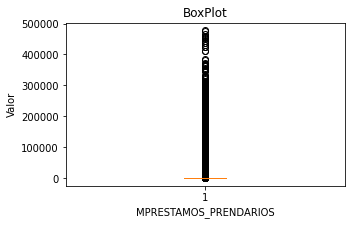

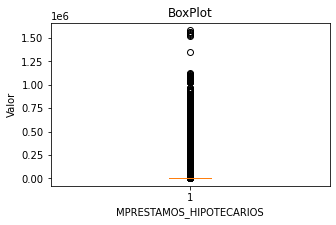

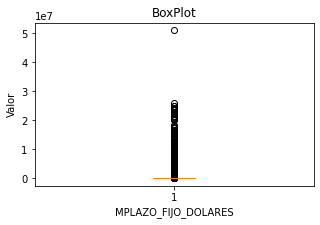

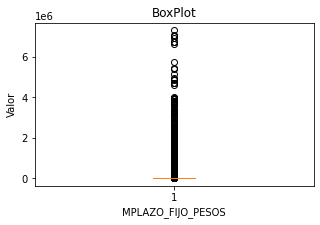

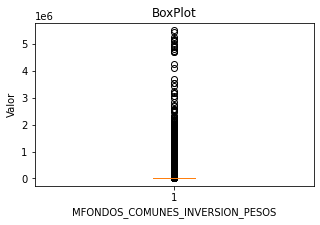

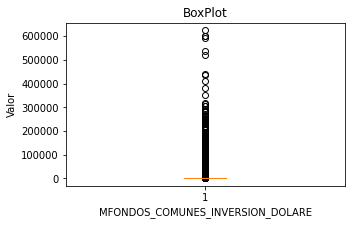

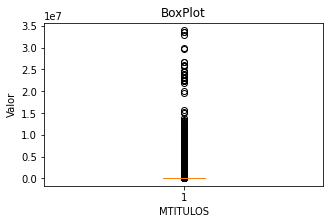

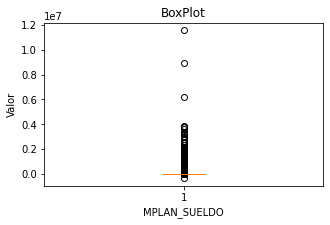

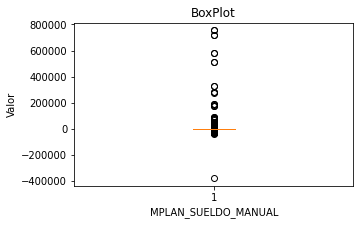

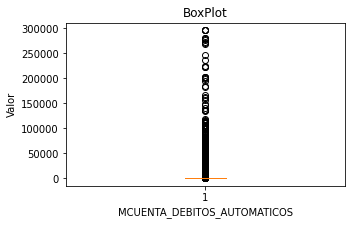

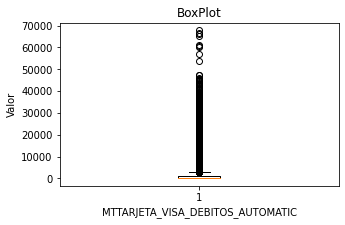

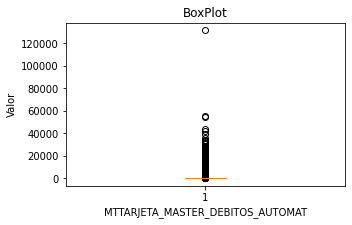

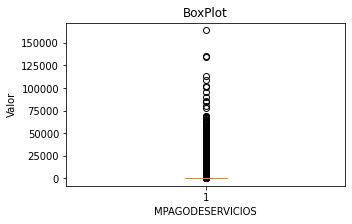

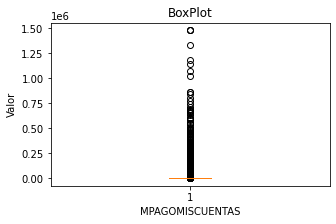

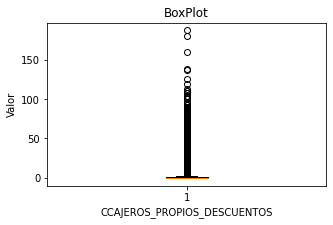

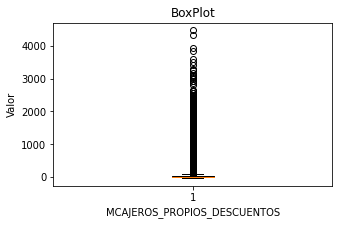

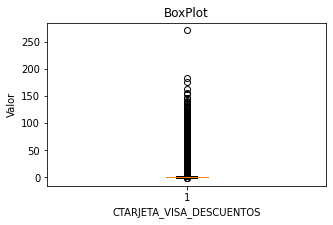

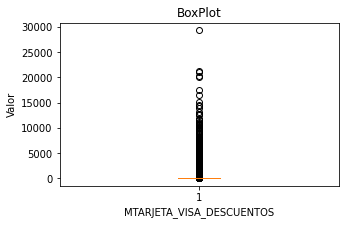

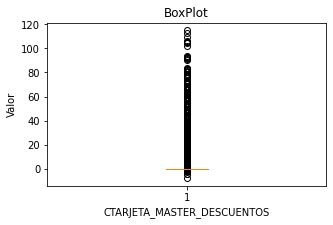

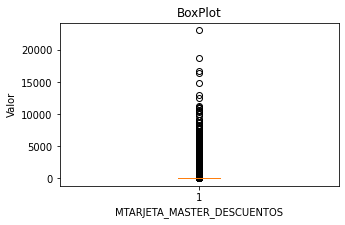

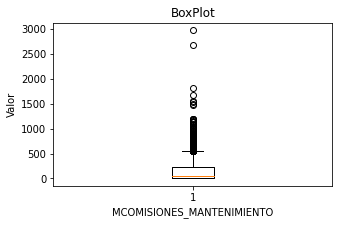

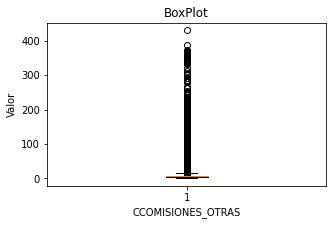

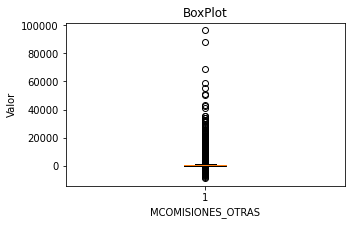

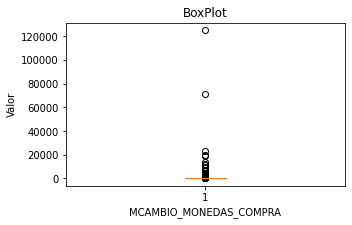

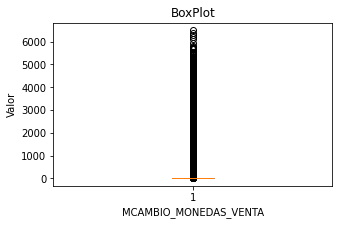

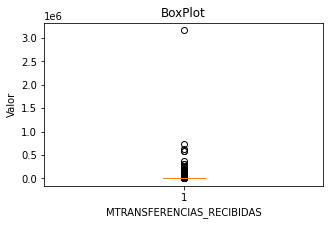

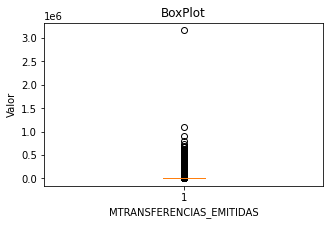

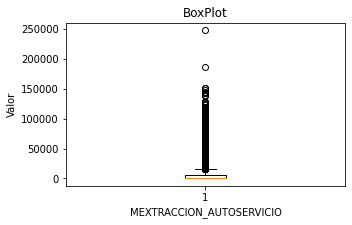

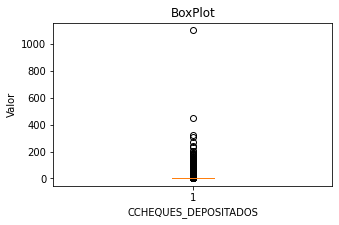

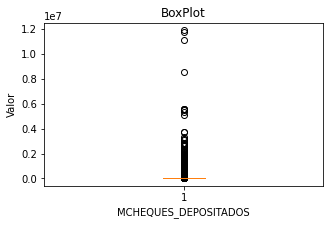

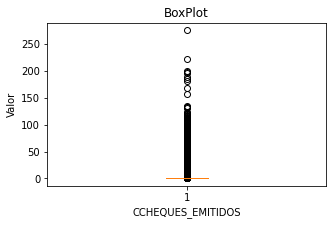

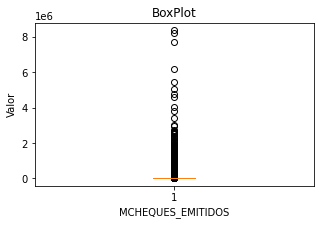

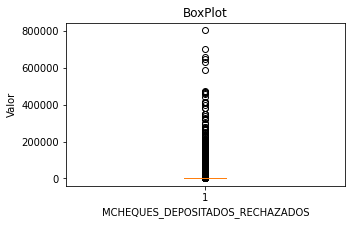

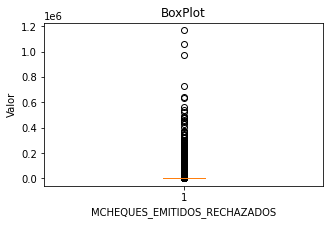

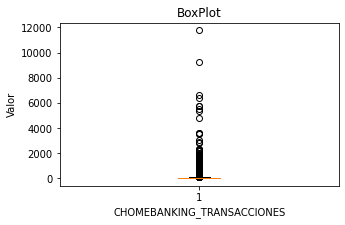

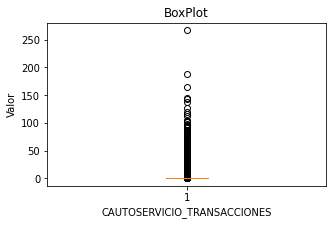

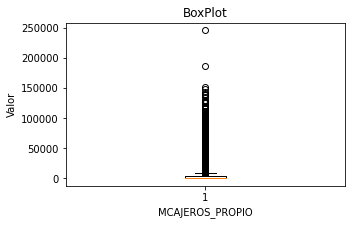

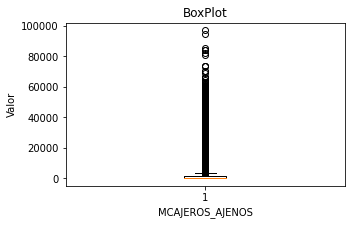

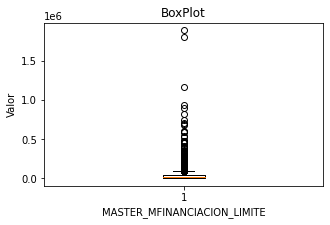

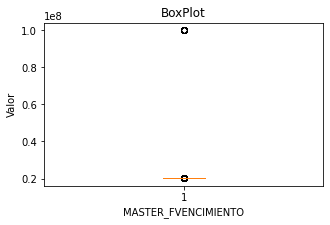

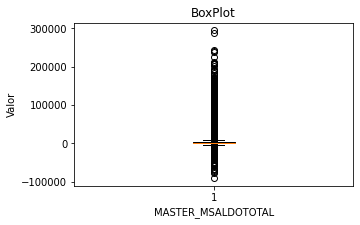

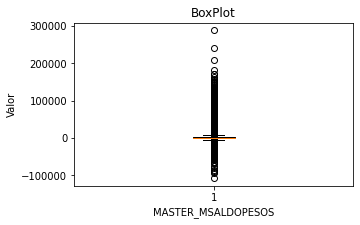

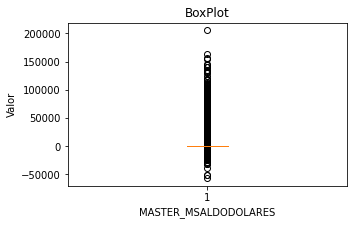

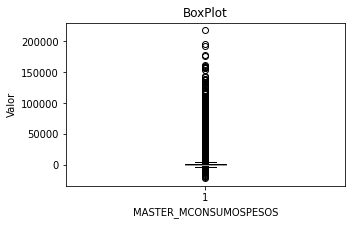

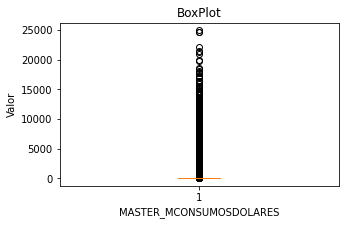

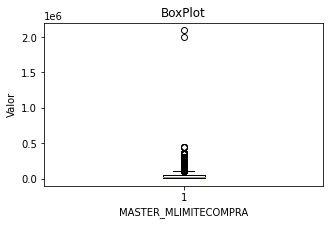

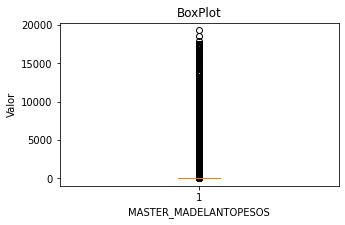

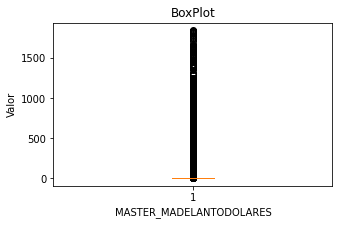

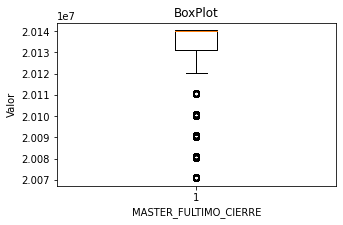

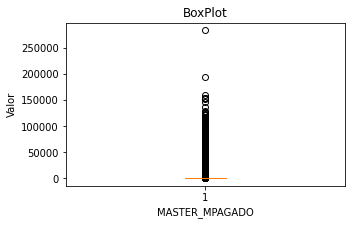

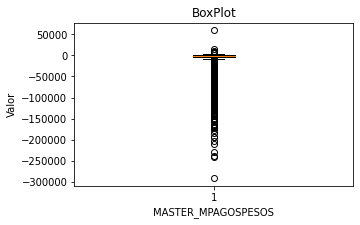

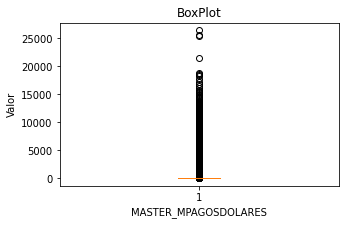

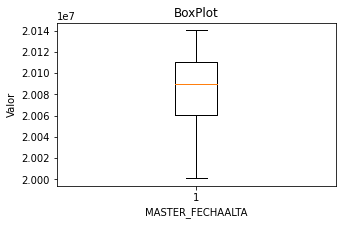

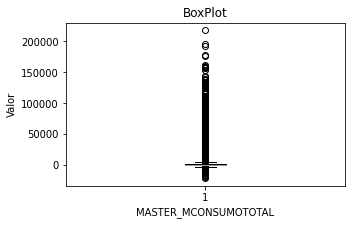

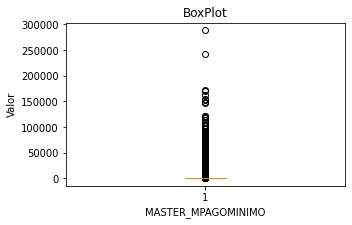

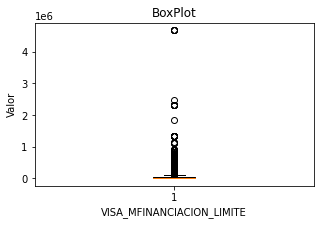

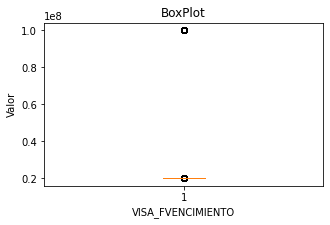

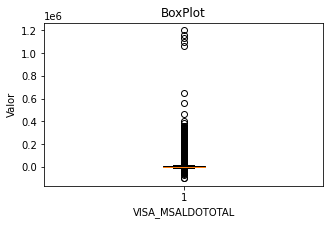

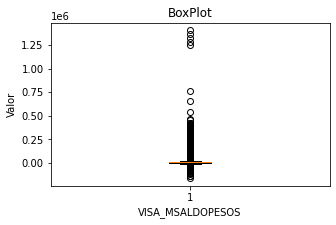

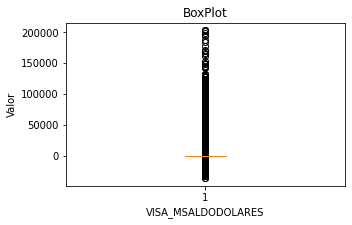

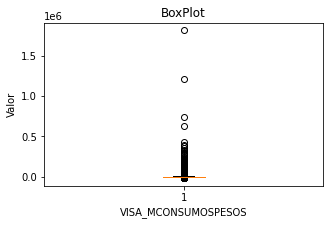

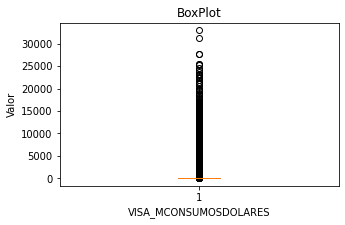

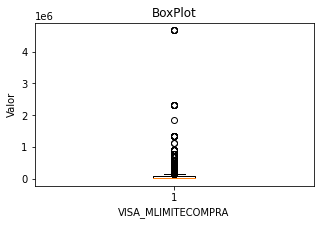

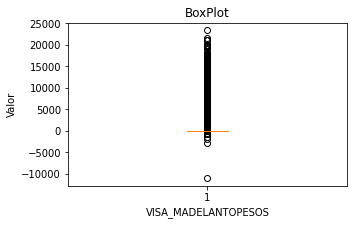

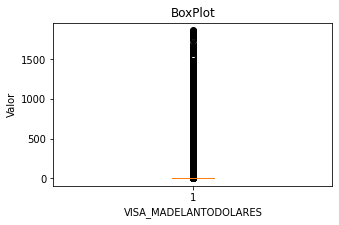

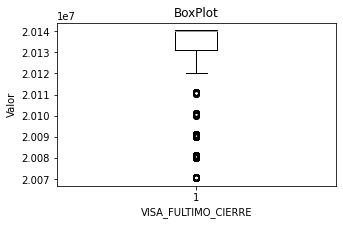

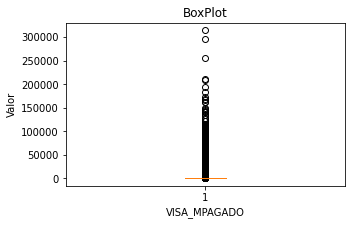

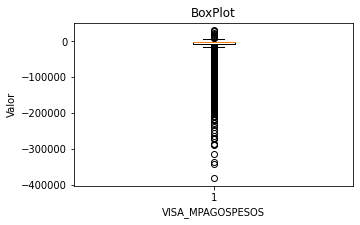

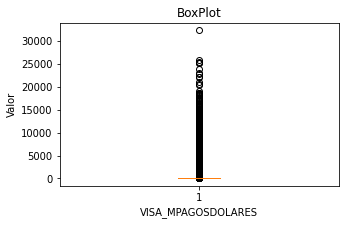

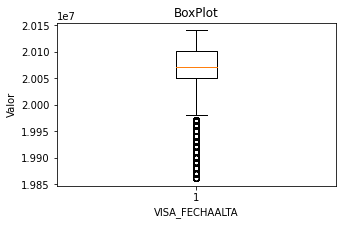

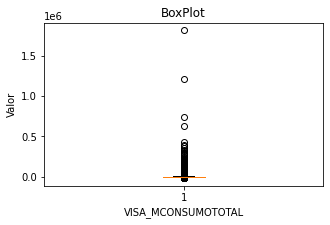

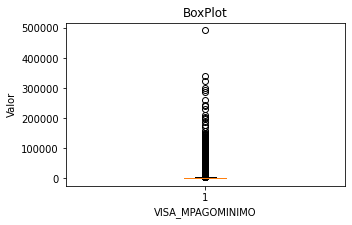

In [ ]:
# Armamos un boxplot para todas las variables numericas

for i in var_continuas:

    plt.figure(figsize=(5,3))
#    plt.boxplot(df[i], vert=False)
    plt.boxplot(df[i].dropna(), vert=True)
    plt.title('BoxPlot')
    plt.xlabel(i)
    plt.ylabel("Valor")
    plt.show()


## Matriz de Correlaciones

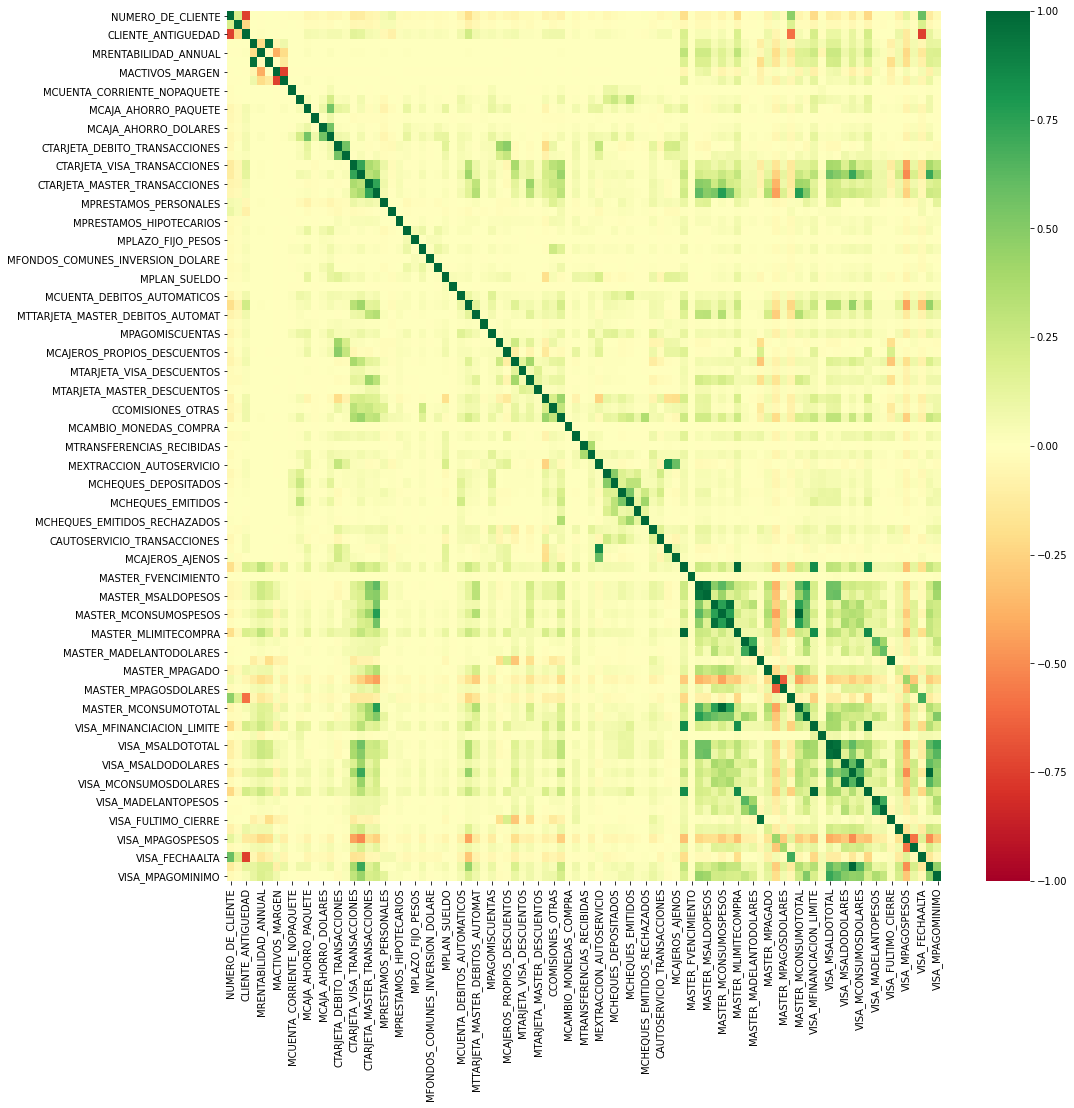

In [ ]:
#Matriz de correlaciones para todas las variables numericas

plt.figure(figsize=(16,16))
    
correlation_matrix = df[var_continuas].corr()
sns.heatmap(correlation_matrix,  vmin=-1, vmax=1, annot=False , cmap='RdYlGn')


## Histograma

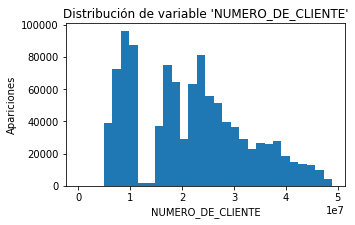

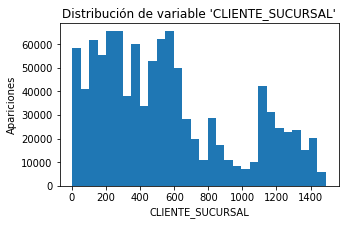

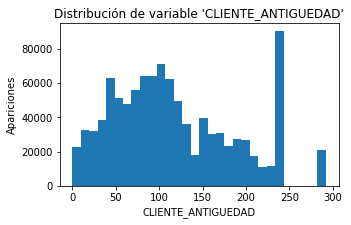

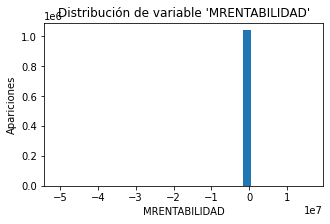

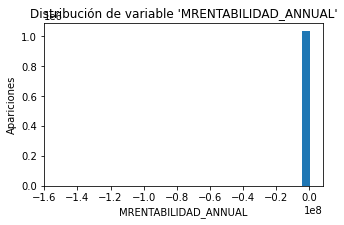

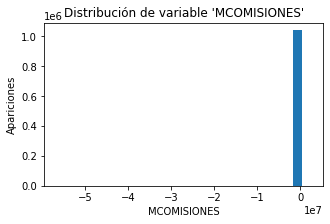

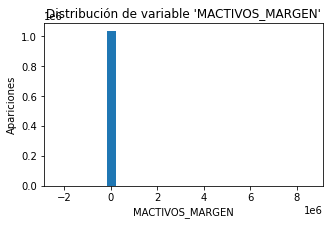

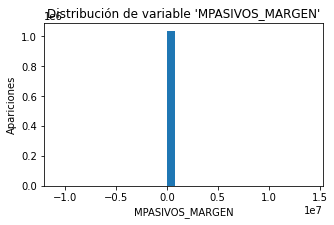

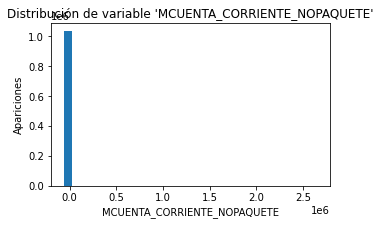

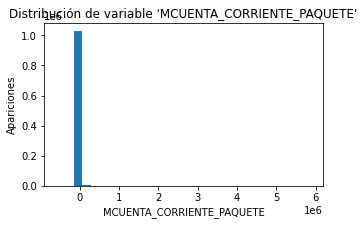

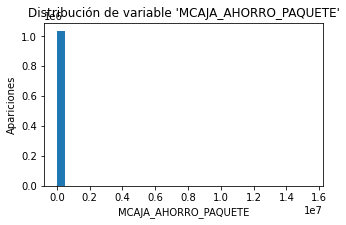

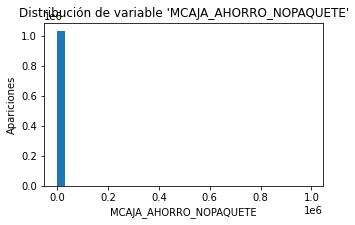

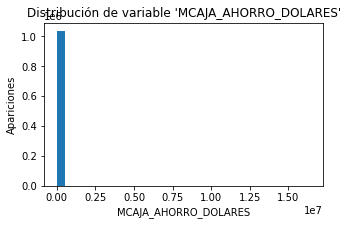

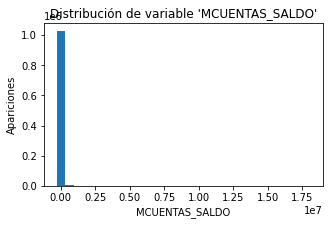

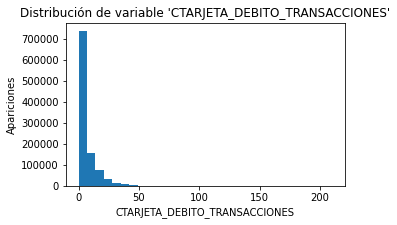

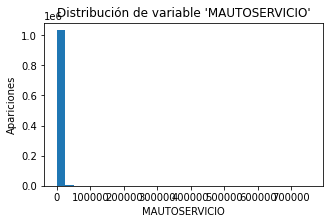

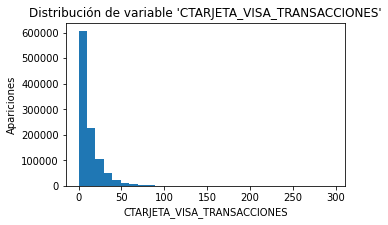

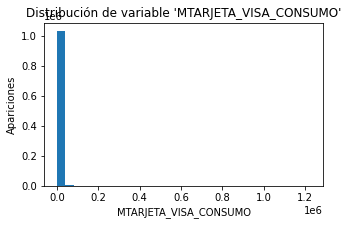

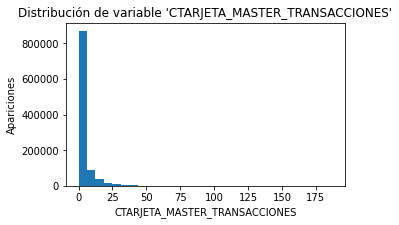

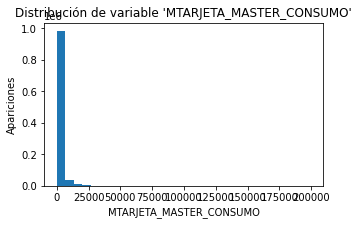

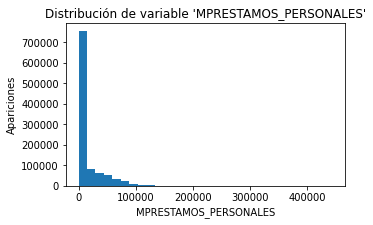

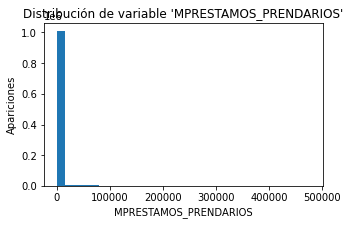

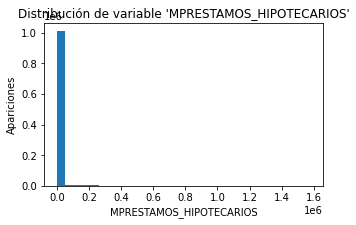

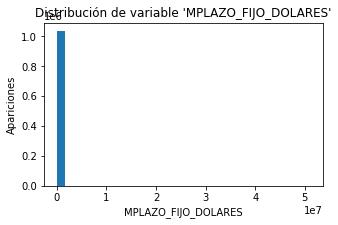

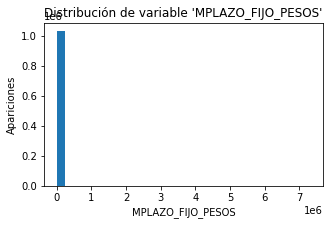

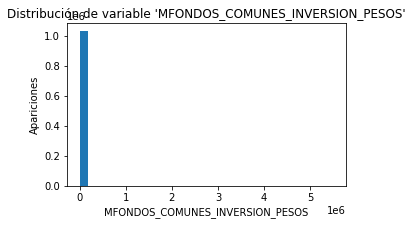

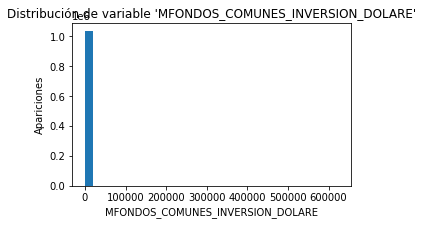

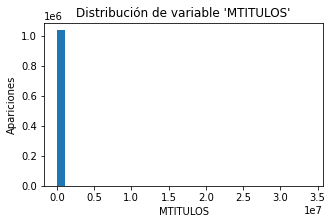

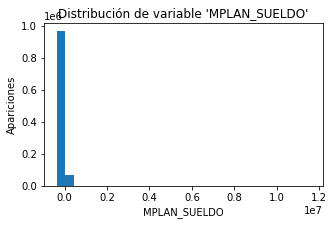

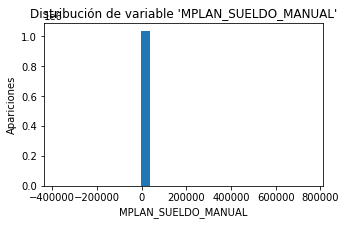

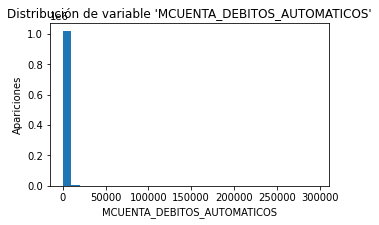

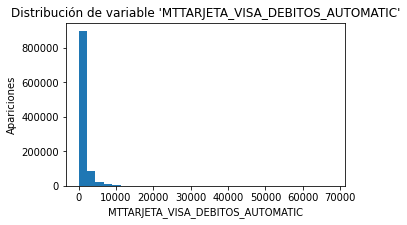

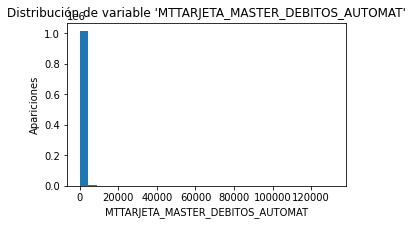

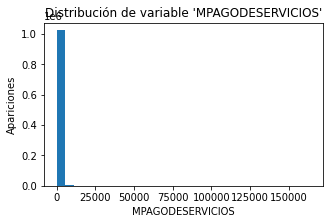

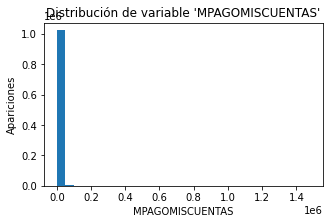

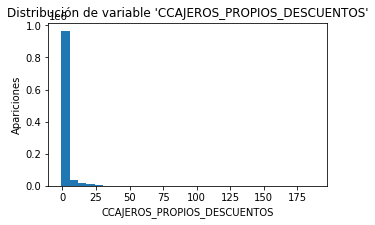

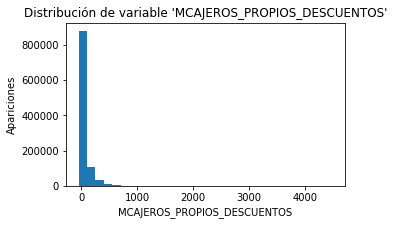

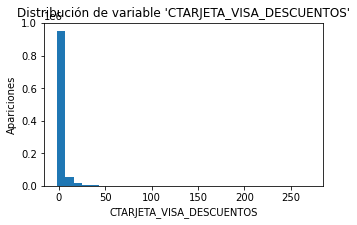

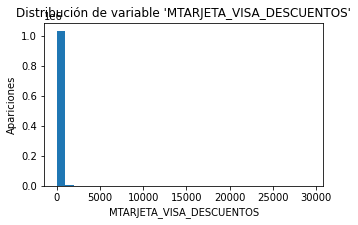

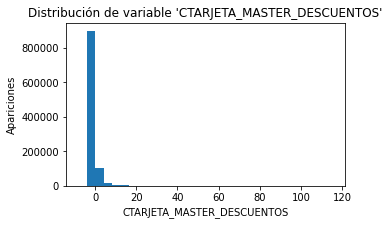

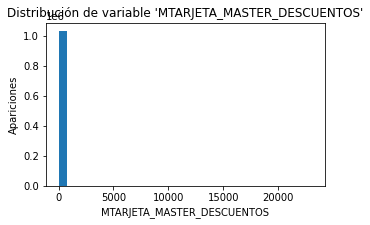

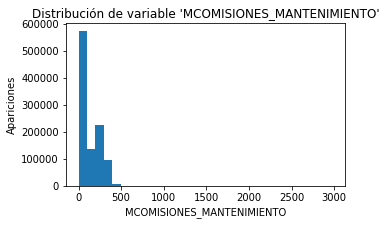

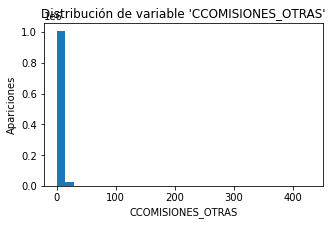

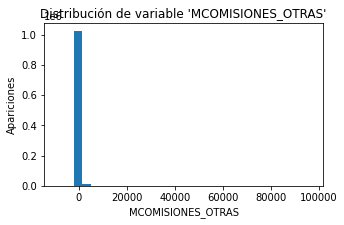

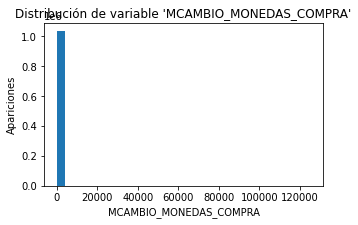

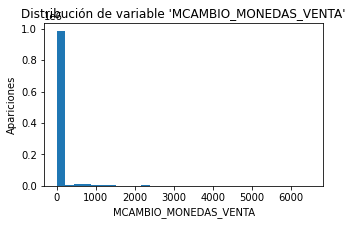

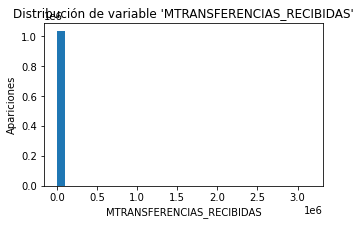

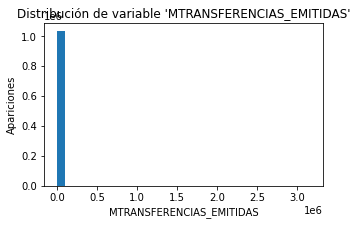

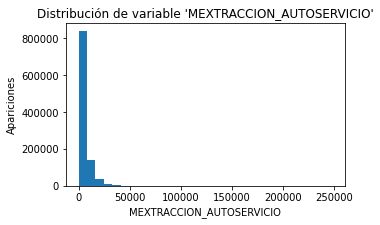

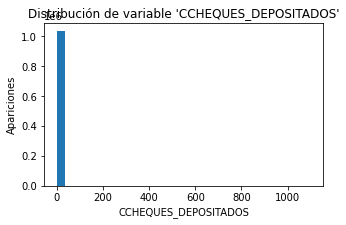

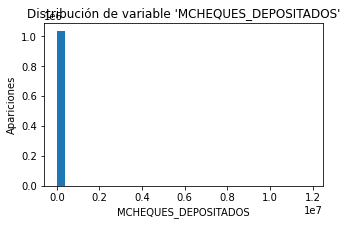

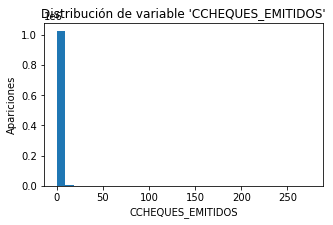

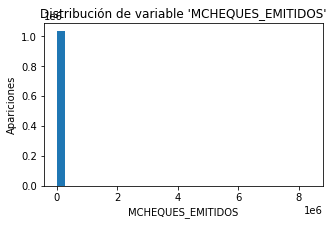

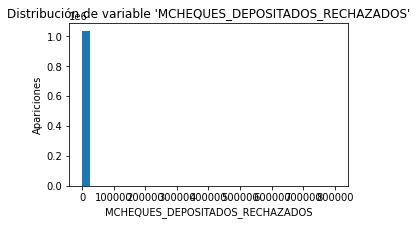

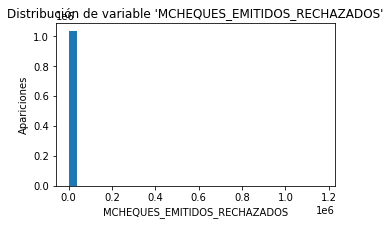

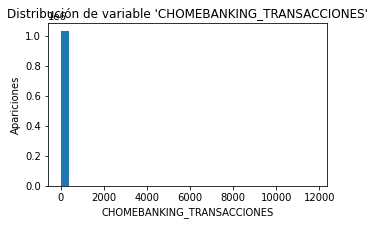

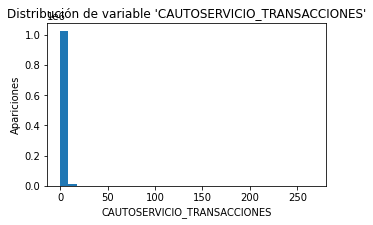

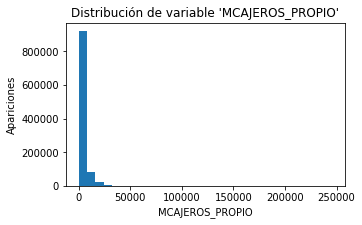

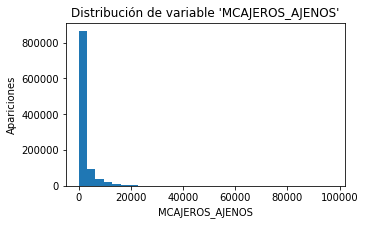

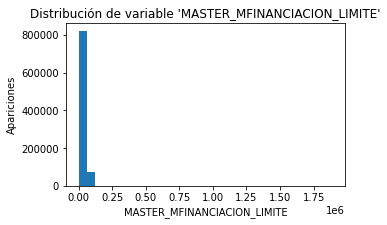

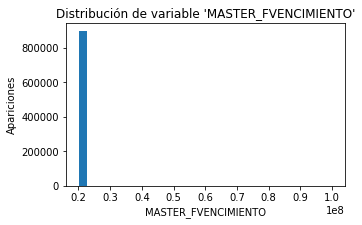

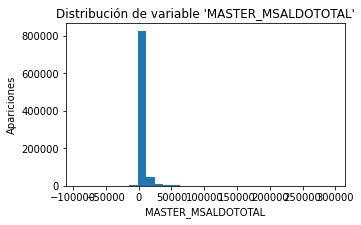

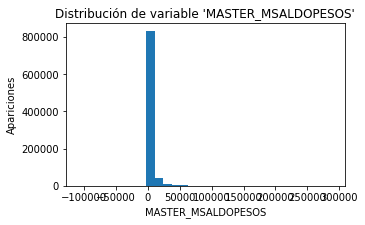

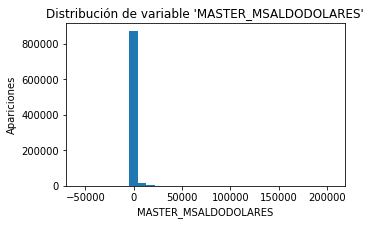

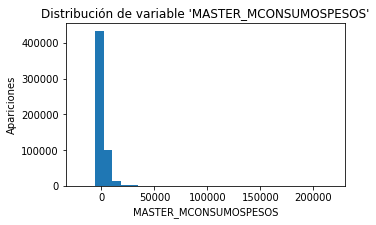

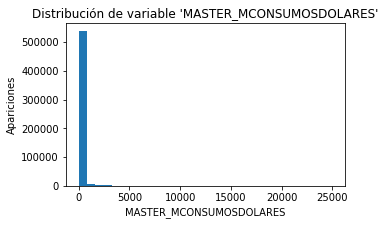

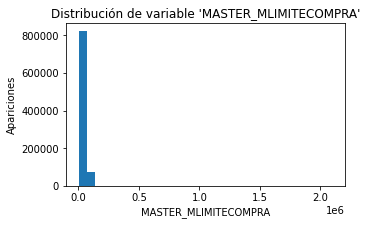

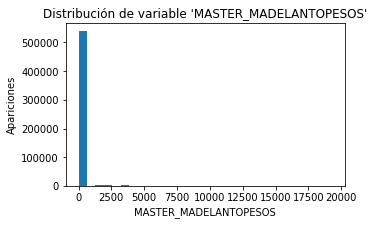

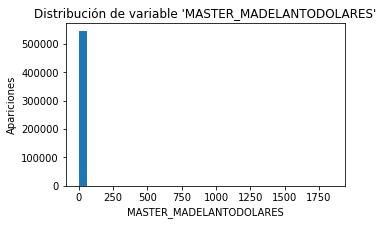

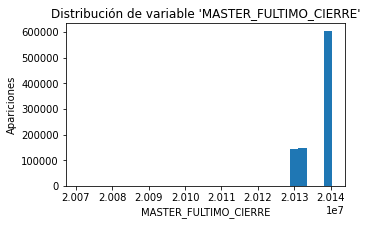

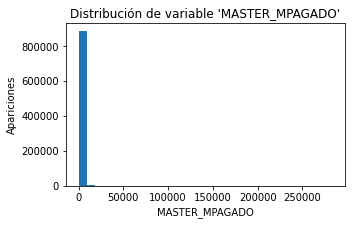

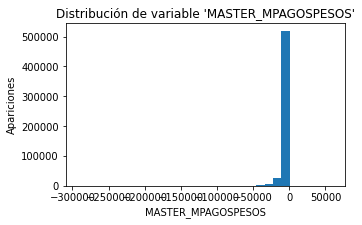

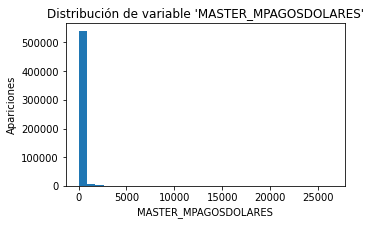

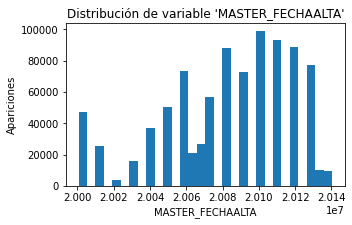

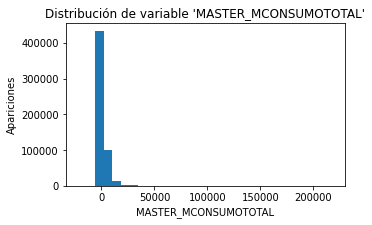

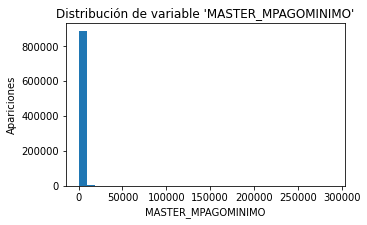

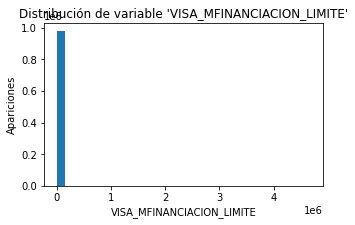

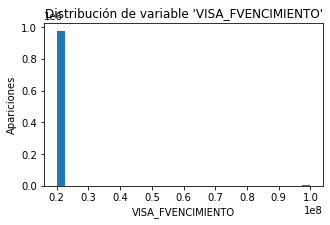

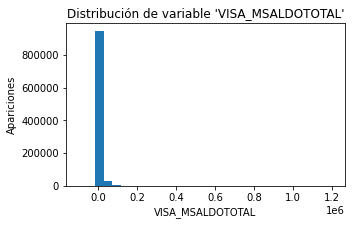

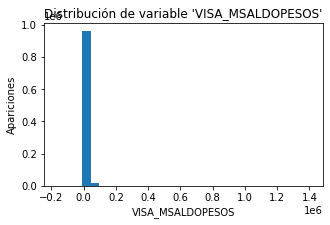

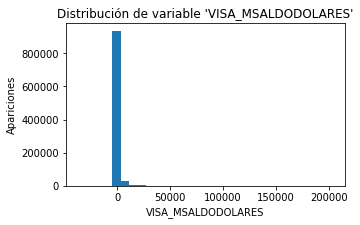

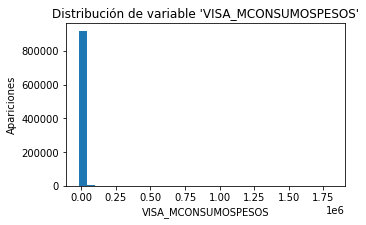

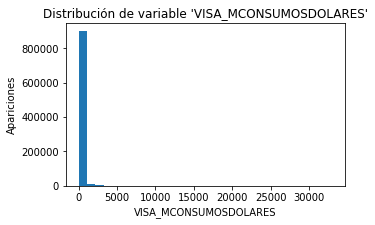

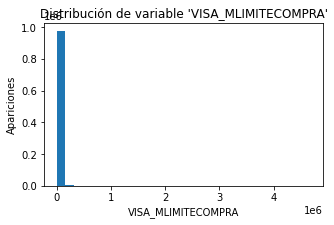

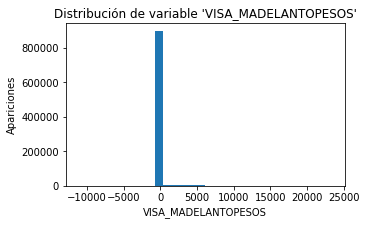

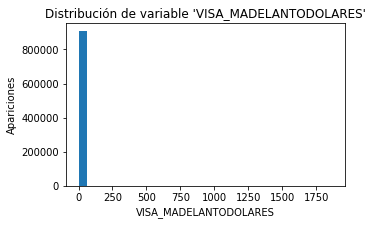

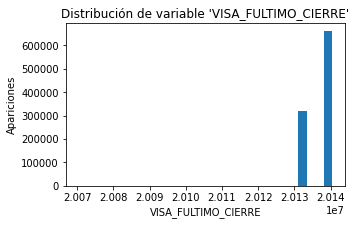

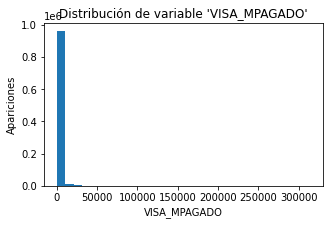

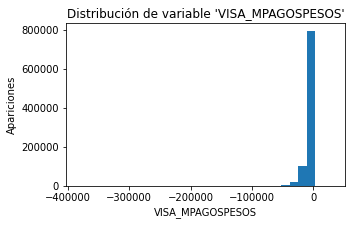

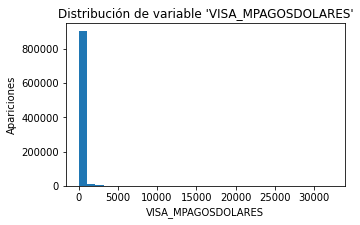

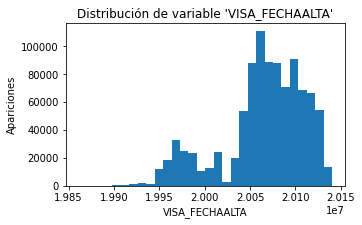

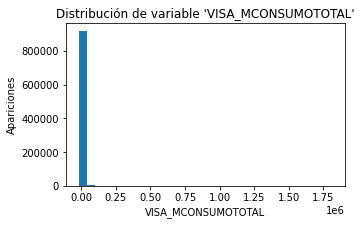

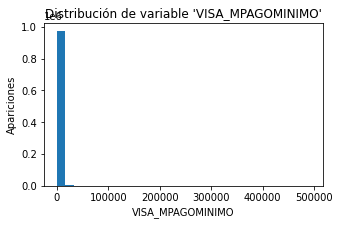

In [ ]:
#Histograma de frecuencias para todas las variables numericas

for i in var_continuas:

    plt.figure(figsize=(5,3))
    plt.hist(df[i].dropna(), bins=30)
    plt.title("Distribución de variable '{}'".format(i))
    plt.xlabel(i)
    plt.ylabel("Apariciones")
    plt.show()

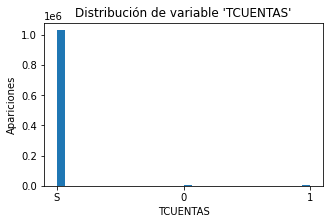

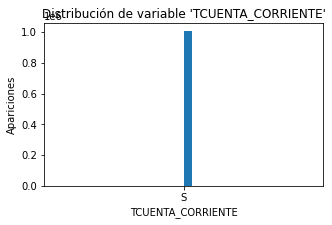

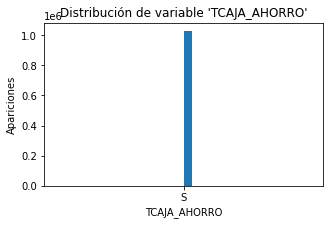

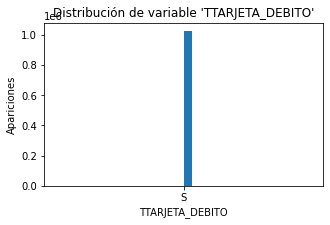

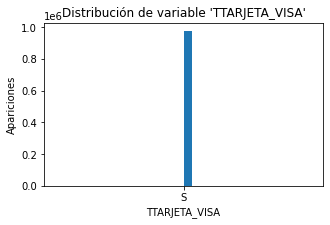

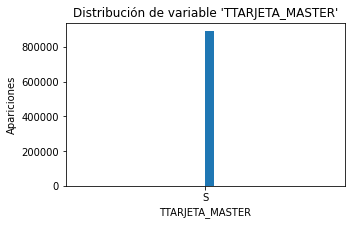

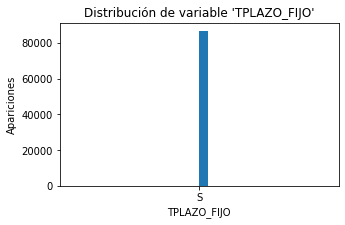

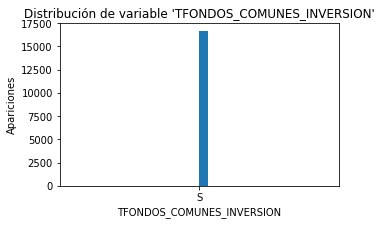

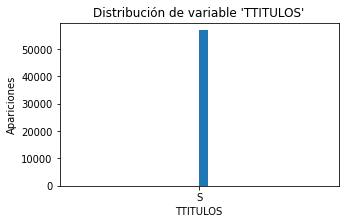

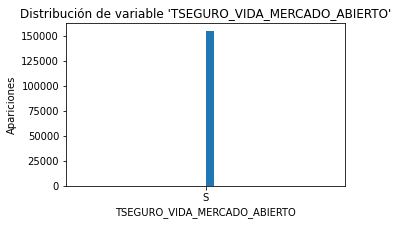

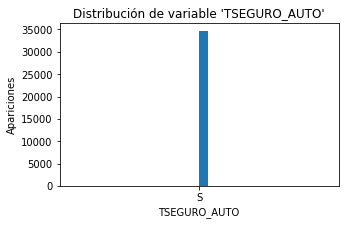

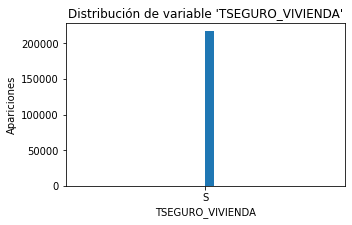

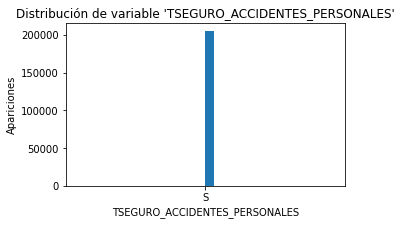

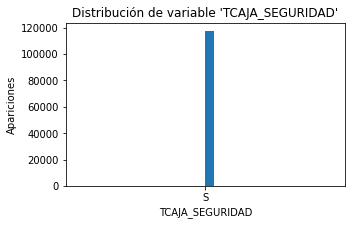

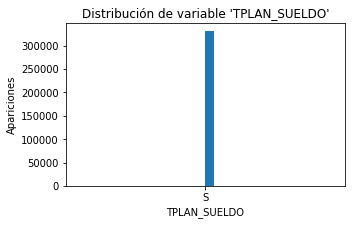

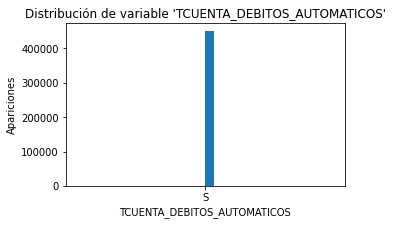

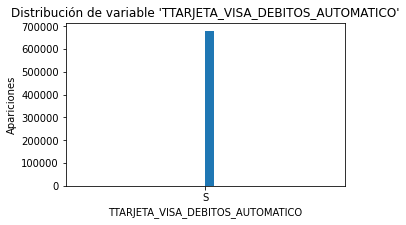

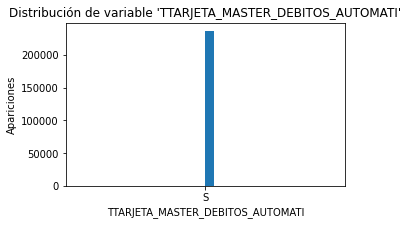

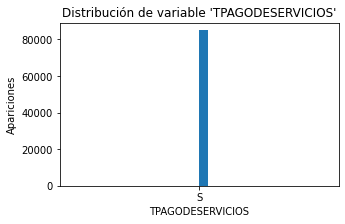

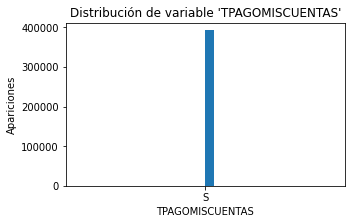

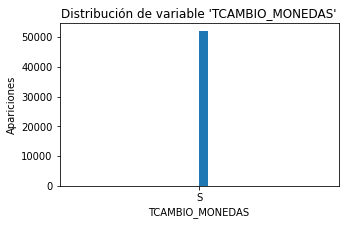

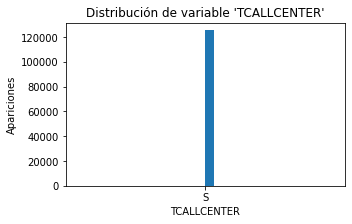

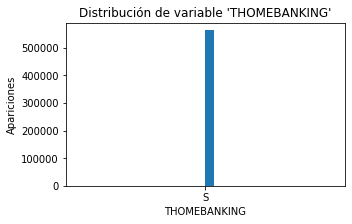

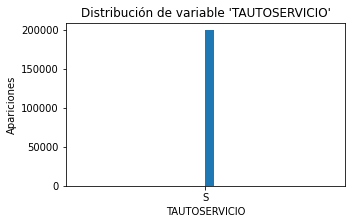

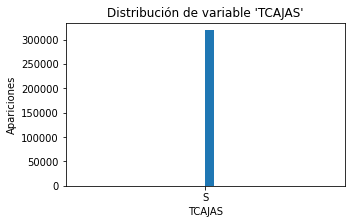

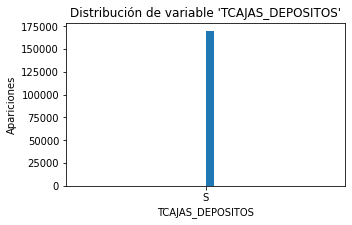

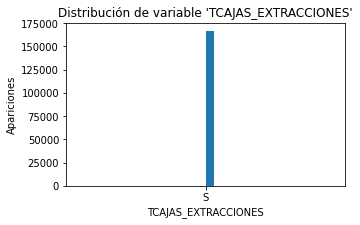

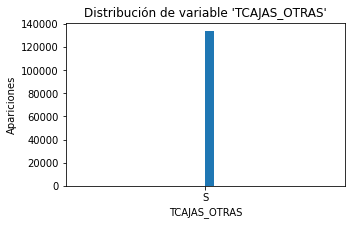

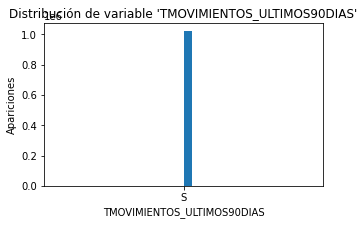

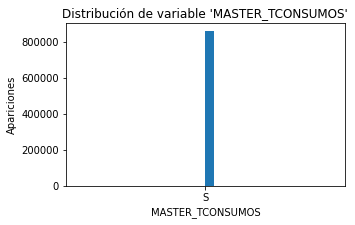

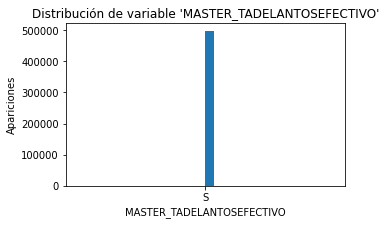

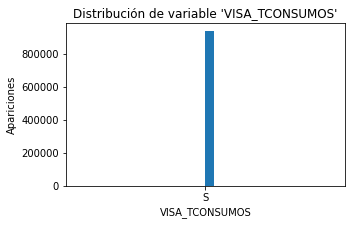

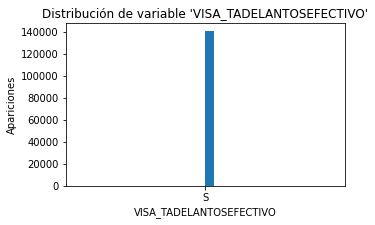

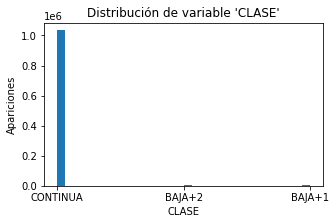

In [ ]:
#Histograma de frecuencias para todas las variables string

for i in var_categoricas_string:

    plt.figure(figsize=(5,3))
    plt.hist(df[i].dropna(), bins=30)
    plt.title("Distribución de variable '{}'".format(i))
    plt.xlabel(i)
    plt.ylabel("Apariciones")
    plt.show()